<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
data = pd.read_csv("../data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<8th grade math>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [3]:
len(data.YEAR.unique())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:
michigan = data[data['STATE'] == 'MICHIGAN']

ohio = data[data['STATE'] == 'OHIO']

print('Michigan average: '+ str(michigan.AVG_MATH_8_SCORE.mean()) + ' Ohio average: '+str(ohio.AVG_MATH_8_SCORE.mean()))

Michigan average: 276.1666666666667 Ohio average: 282.25


Find the average for your outcome score across all states in 2019

In [5]:
year_19 = data[data['YEAR']==2019]
year_19.AVG_MATH_8_SCORE.mean()

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [6]:
data.groupby(['STATE']).AVG_MATH_8_SCORE.max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [7]:
#Creating feature that tracks teaching expendeture per student 

data['EXPEND_INSTRUCT_PER_STUDENT'] = data.INSTRUCTION_EXPENDITURE/data.GRADES_8_G

In [8]:
data.EXPEND_INSTRUCT_PER_STUDENT.mean()

67.08152026603581

Final feature list: **<Local revenue, Expend_Instruct_per_student, state revenue,SUPPORT_SERVICES_EXPENDITURE\>**

Feature selection justification: I picked these features because I believe they best would correlate to the outcome from a causal perspective. I believe that local revenue would indicate wealth locally as well as state revenue. At least nyc often times the quality of a school is a result of the immediate local revenue so I thought it would be worth including. i also thought that I should include my own feature expendeture on instruction per student. This feature now takes into account how much is spent on a student. Expendeture alone may be mislead as there may just be more students. I think this feature would provide a stronger correlation. I lastly included support students expendeture because mental health may also have a larger impact on scores as well.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

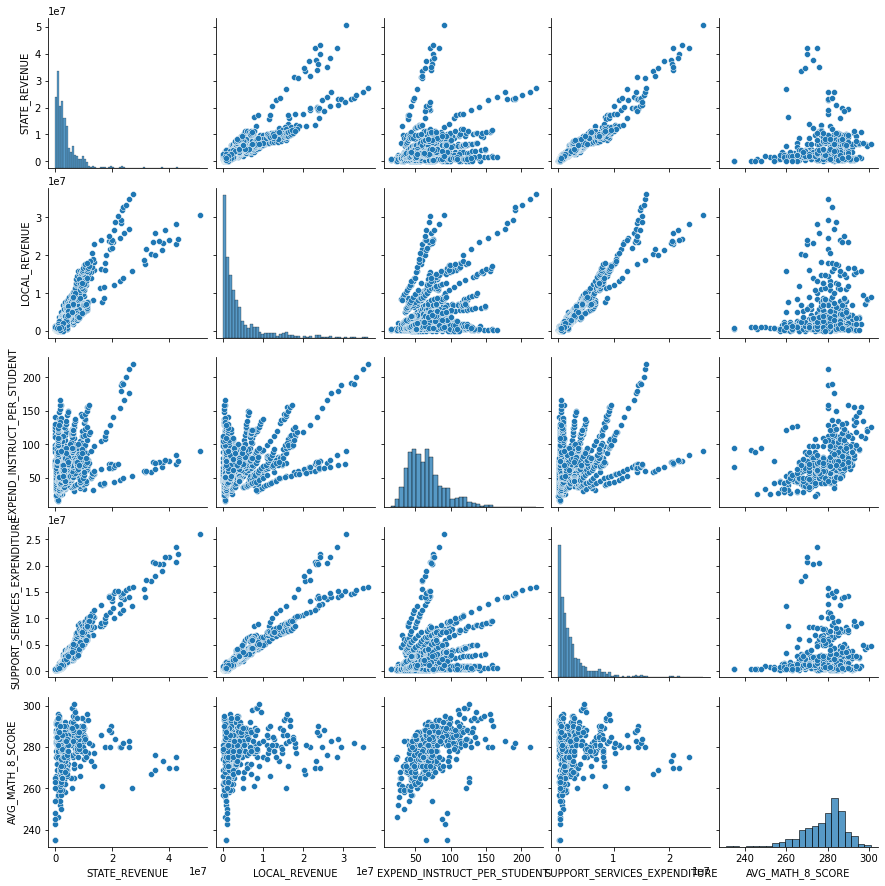

In [9]:
training = data[['STATE_REVENUE','LOCAL_REVENUE','EXPEND_INSTRUCT_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE','AVG_MATH_8_SCORE']]
sns.pairplot(training)


For this visual we can see the correlations between the different variables. The goal of this plot was to try to see if there was a correlation between the variables and the predictor (AVG_MATH_8_SCORE). WE can see that between the variables there are strong correlations such as with Local Revenue and SUPPORT SERVICE EXPENDETURE. If we look at the bottom most column we see the predictors correlation with the other predictors is loosely postive as well.

**Visualization 2**

<AxesSubplot:xlabel='AVG_MATH_8_SCORE'>

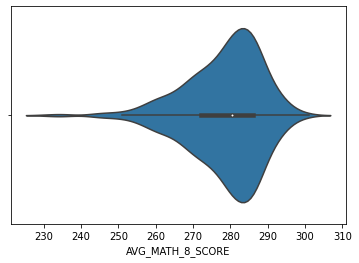

In [10]:
sns.violinplot(x=data["AVG_MATH_8_SCORE"])

This is a violin plot for the data. Here we can see the distribution of the target which is around 283. We can also see that most of the data is concentrated around the mean with some large outliers. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
training.AVG_MATH_8_SCORE.isna().sum()

1113

In [13]:
training_final = training.dropna()
training_final.shape

(439, 5)

In [14]:
X = training_final.iloc[:,:-1]
y = training_final.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [16]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "EXPEND_INSTRUCT_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")

<h2> Summary </h2>

The model that I built was a linear regression designed to predict the Average Math score for 8th grade taking the NAEP math exam. I used one feature engineered column to show the expendeture for instruction per a student. I thought that this would also control for the size of a certain school in one feature. I used this feature alongside STATE_REVENUE LOCAL_REVENUE EXPEND_INSTRUCT_PER_STUDENT SUPPORT_SERVICES_EXPENDITURE to predict it. Using the scatter plots between the different variables they looked linearly correlated with the math score so I decided to use a linear regression model on the training data. One fallback however was that there were a lot of entries where either the target was missing or there was no data for all the features. I decided to drop them because there can be no missing values for the target and just too much missing the data. Looking at the graph at the end the model seems to decently predict math scores aside from the upper range